# Rainfall Weather Forecasting

In [ ]:
Project Description
Weather forecasting is the application of science and technology to predict the 
conditions of the atmosphere for a given location and time. Weather forecasts are 
made by collecting quantitative data about the current state of the atmosphere at a 
given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains
about 10 years of daily weather observations of different locations in Australia. Here,
predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast 
whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict 
how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, 
    otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . 
A kind of measure of the "risk".

Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv


# Define Problem statelemt

# Data Gathering

In [3]:
path_name = "/Users/geetanjalijoshi/Desktop/DATASCIENCE/Rainfall.csv"

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# load dataset
rain_weather_data = pd.read_csv(path_name)
# Show all columns in the DataFrame format
pd.set_option('display.max_columns', None)
rain_weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Preprocessing

In [6]:
# show all the column names
rain_weather_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# total number of rows and columns
rain_weather_data.shape

(8425, 23)

In [8]:
rain_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [9]:
df = rain_weather_data.copy()

# Data Cleaning

In [10]:
# Correcting Errors if any
# Change the Date column datatype to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6762 non-null   datetime64[ns]
 1   Location       6762 non-null   object        
 2   MinTemp        6692 non-null   float64       
 3   MaxTemp        6705 non-null   float64       
 4   Rainfall       6624 non-null   float64       
 5   Evaporation    3841 non-null   float64       
 6   Sunshine       3526 non-null   float64       
 7   WindGustDir    5820 non-null   object        
 8   WindGustSpeed  5820 non-null   float64       
 9   WindDir9am     5968 non-null   object        
 10  WindDir3pm     6468 non-null   object        
 11  WindSpeed9am   6699 non-null   float64       
 12  WindSpeed3pm   6662 non-null   float64       
 13  Humidity9am    6708 non-null   float64       
 14  Humidity3pm    6666 non-null   float64       
 15  Pressure9am    5454 n

In [12]:
df.shape

(6762, 23)

# Handle missing values

In [13]:
# Find null values
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [14]:
df.shape

(6762, 23)

In [15]:
# imputing null values witj mode for object datatype columns and with mean for other type of columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0],inplace = True)
    else:
        df[column].fillna(df[column].mean(),inplace = True)   

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Data Transformation

In [17]:
# Extract Month and Year from Date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(["Date"],axis=1,inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year
0,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,No,No,12,2008
1,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,No,No,12,2008
2,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,No,No,12,2008
3,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,No,No,12,2008
4,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,12,2008


In [18]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"\nValue count for:{column}")
    print(value_counts)
    print("-"*50)


Value count for:Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
--------------------------------------------------

Value count for:MinTemp
 13.109145    70
 13.200000    58
 12.000000    57
 14.800000    53
 12.700000    53
              ..
-1.200000      1
-1.500000      1
-1.700000      1
-0.800000      1
 26.000000     1
Name: MinTemp, Length: 286, dtype: int64
--------------------------------------------------

Value count for:MaxTemp
19.000000    66
19.800000    62
24.098345    57
23.800000    54
22.300000    54
             ..
10.300000     1
10.000000     1
10.400000     1
11.700000     1
43.500000     1
Name: MaxTemp, Length: 332, dtype: int64
--------------------------------------------------

Value count for:Rainfall
0.000000      4334


# Feature Engineering

In [19]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Year'],
      dtype='object')

In [20]:
#creating new features 

# Average Temperature
df['Temp_avg'] = (df['MaxTemp'] + df['MinTemp']) / 2
df.drop(['MaxTemp', 'MinTemp'], axis=1, inplace=True)

# Average Wind Speed
# Create the 'Windspeed_avg' feature including WindGustSpeed
df['Windspeed_avg'] = (df['WindSpeed9am'] + df['WindSpeed3pm'] + df['WindGustSpeed']) / 3
df.drop(['WindSpeed9am', 'WindSpeed3pm','WindGustSpeed'], axis=1, inplace=True)

# Average Pressure
df['Pressure_avg'] = (df['Pressure9am'] + df['Pressure3pm']) / 2
df.drop(['Pressure9am', 'Pressure3pm'], axis=1, inplace=True)

# Average Cloud Cover
df['Cloud_avg'] = (df['Cloud3pm'] + df['Cloud9am']) / 2
df.drop(['Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Average Humidity
df['Humidity_avg'] = (df['Humidity3pm'] + df['Humidity9am']) / 2
df.drop(['Humidity9am', 'Humidity3pm'], axis=1, inplace=True)

# Display the first few rows to verify the new features
df.head()


,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindDir9am,WindDir3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Temp_avg,Windspeed_avg,Pressure_avg,Cloud_avg,Humidity_avg
0,Albury,0.6,5.302395,7.890896,W,W,WNW,16.9,21.8,No,No,12,2008,18.15,29.333333,1007.40,6.160494,46.5
1,Albury,0.0,5.302395,7.890896,WNW,NNW,WSW,17.2,24.3,No,No,12,2008,16.25,23.333333,1009.20,4.328897,34.5
2,Albury,0.0,5.302395,7.890896,WSW,W,WSW,21.0,23.2,No,No,12,2008,19.30,30.333333,1008.15,3.168403,34.0
3,Albury,0.0,5.302395,7.890896,NE,SE,E,18.1,26.5,No,No,12,2008,18.60,14.666667,1015.20,4.328897,30.5
4,Albury,1.0,5.302395,7.890896,W,ENE,NW,17.8,29.7,No,No,12,2008,24.90,22.666667,1008.40,7.500000,57.5


In [21]:
# Dropping other irrelevant columns from the dataset
df.drop(['WindGustDir','WindDir9am', 'WindDir3pm', 'Temp9am', 'Temp3pm'], axis =1, inplace = True)

In [22]:
df.columns

Index(['Location', 'Rainfall', 'Evaporation', 'Sunshine', 'RainToday',
       'RainTomorrow', 'Month', 'Year', 'Temp_avg', 'Windspeed_avg',
       'Pressure_avg', 'Cloud_avg', 'Humidity_avg'],
      dtype='object')

In [23]:
df.shape

(6762, 13)

In [24]:
df.isnull().sum()

Location         0
Rainfall         0
Evaporation      0
Sunshine         0
RainToday        0
RainTomorrow     0
Month            0
Year             0
Temp_avg         0
Windspeed_avg    0
Pressure_avg     0
Cloud_avg        0
Humidity_avg     0
dtype: int64

# Data Visualization

# univariate analysis

In [25]:
# Summary Statistics for Numerical Features
print("Summary Statistics for Numerical Features")
df.describe()

Summary Statistics for Numerical Features


,Rainfall,Evaporation,Sunshine,Month,Year,Temp_avg,Windspeed_avg,Pressure_avg,Cloud_avg,Humidity_avg
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,2.780148,5.302395,7.890896,6.462141,2012.052203,18.603745,23.110340,1016.373117,4.328897,58.986853
std,10.482769,3.343713,2.733639,3.377471,2.301057,5.425283,9.324107,5.942147,2.142558,16.155082
min,0.000000,0.000000,0.000000,1.000000,2008.000000,3.450000,2.333333,986.350000,0.000000,8.500000
25%,0.000000,4.000000,7.890896,4.000000,2010.000000,14.500000,16.000000,1012.950000,3.000000,48.000000
50%,0.000000,5.302395,7.890896,6.000000,2012.000000,18.350000,22.000000,1016.373117,4.328897,59.500000
75%,1.200000,5.302395,9.200000,9.000000,2014.000000,22.800000,28.911082,1019.600000,6.000000,70.000000
max,371.000000,145.000000,13.900000,12.000000,2017.000000,35.750000,67.000000,1037.300000,8.000000,98.500000


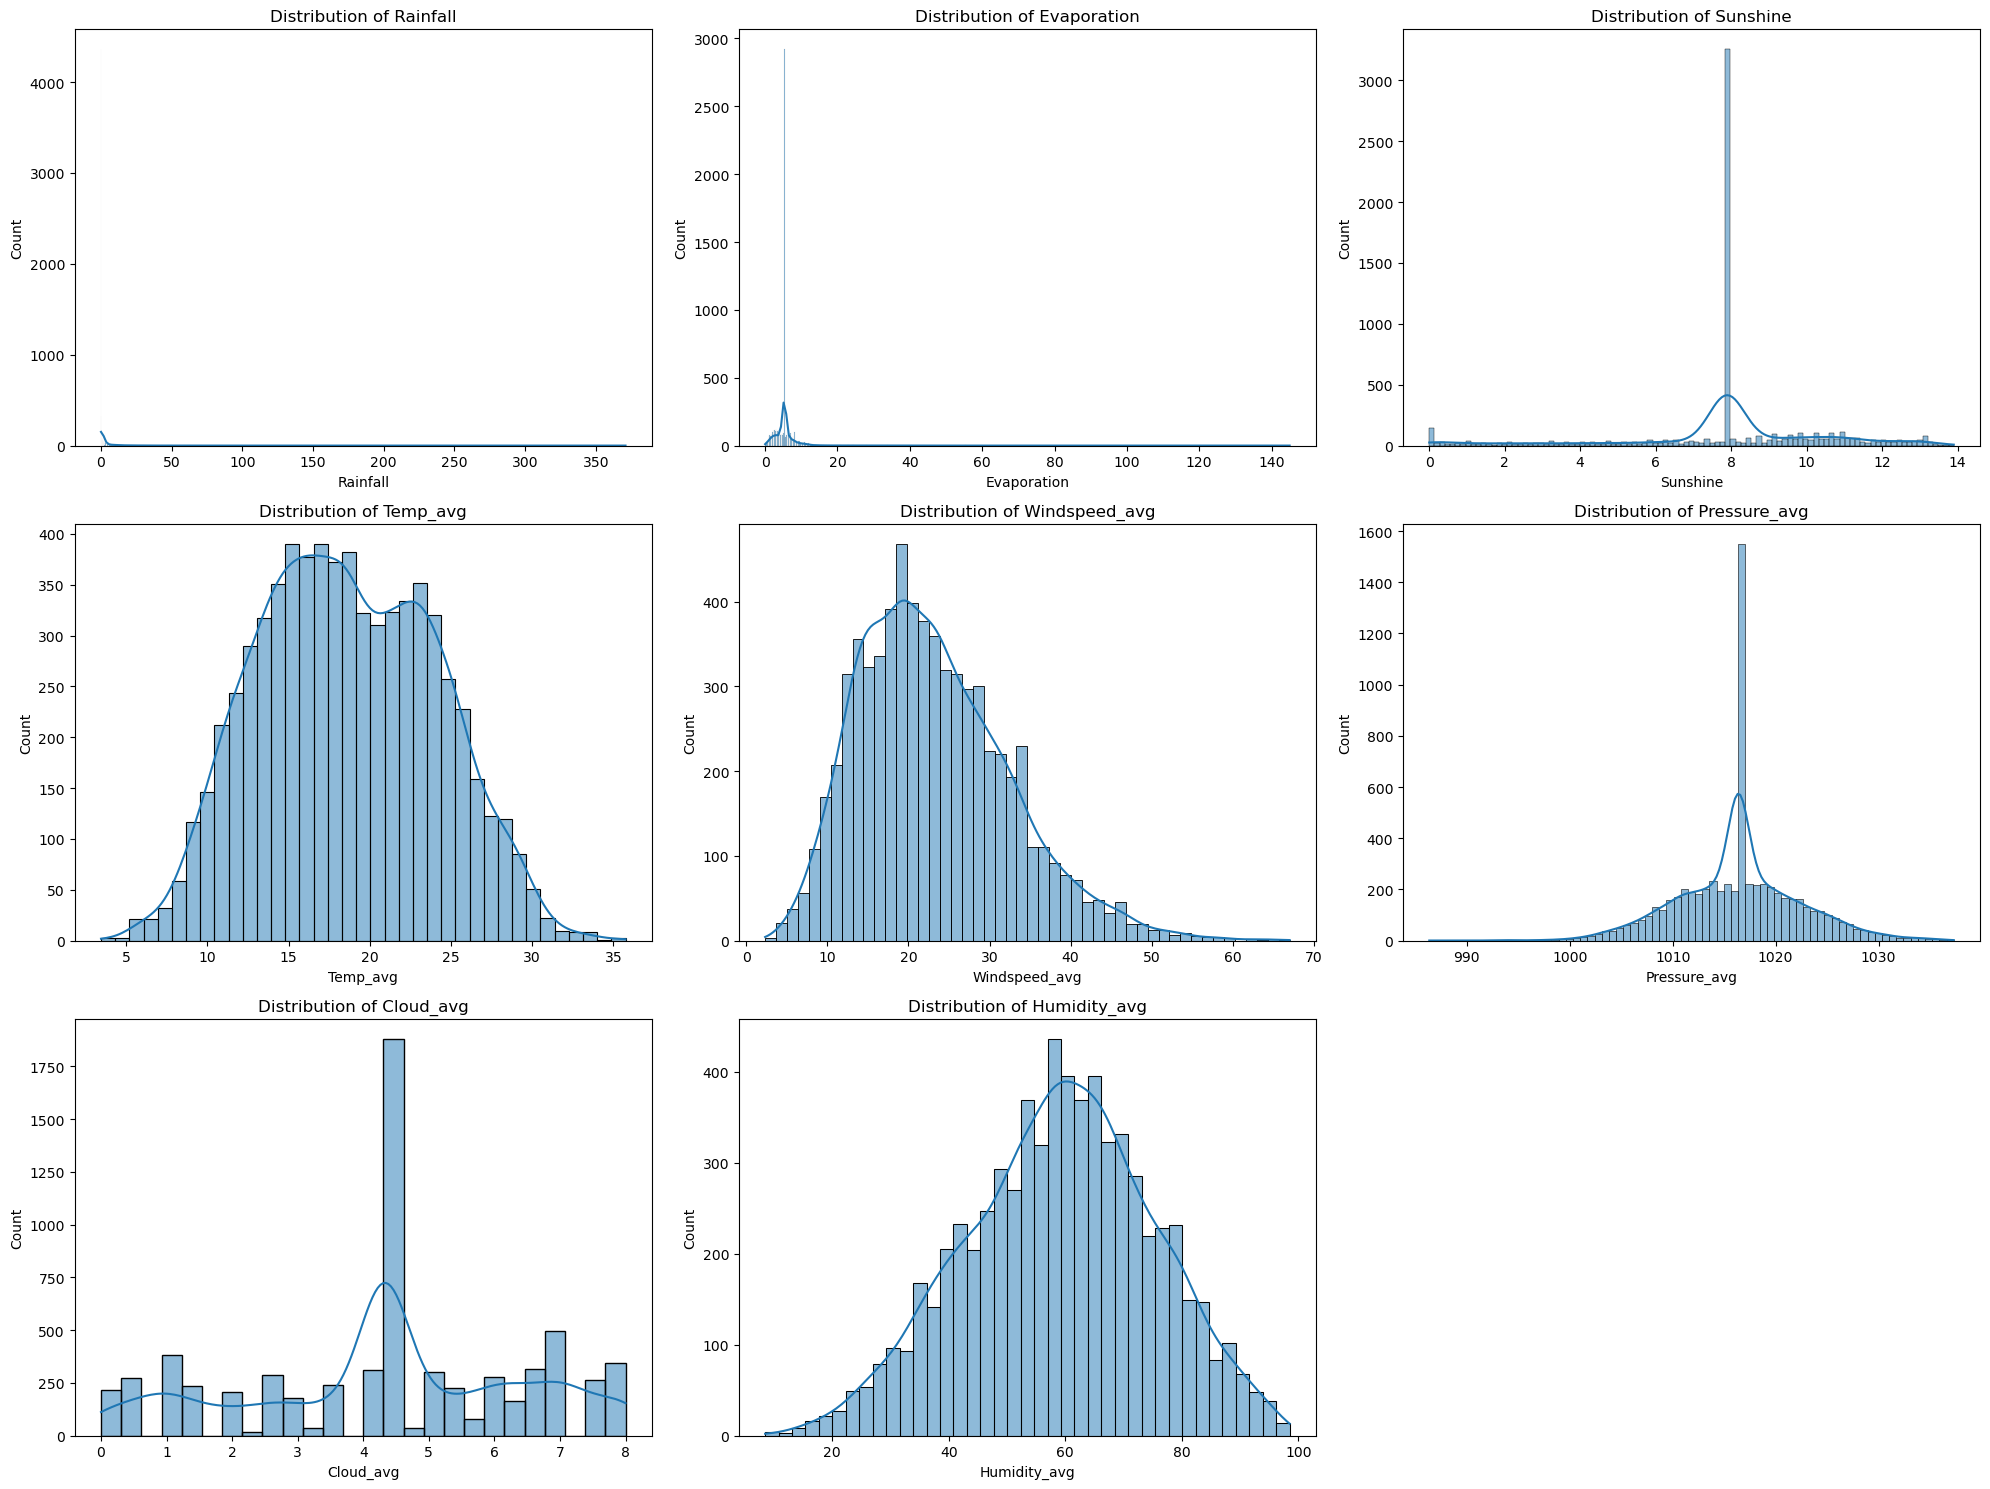

In [26]:
# Distribution Plots for Numerical Features
numerical_features = ['Rainfall', 'Evaporation', 'Sunshine', 'Temp_avg', 'Windspeed_avg', 'Pressure_avg', 'Cloud_avg', 'Humidity_avg']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

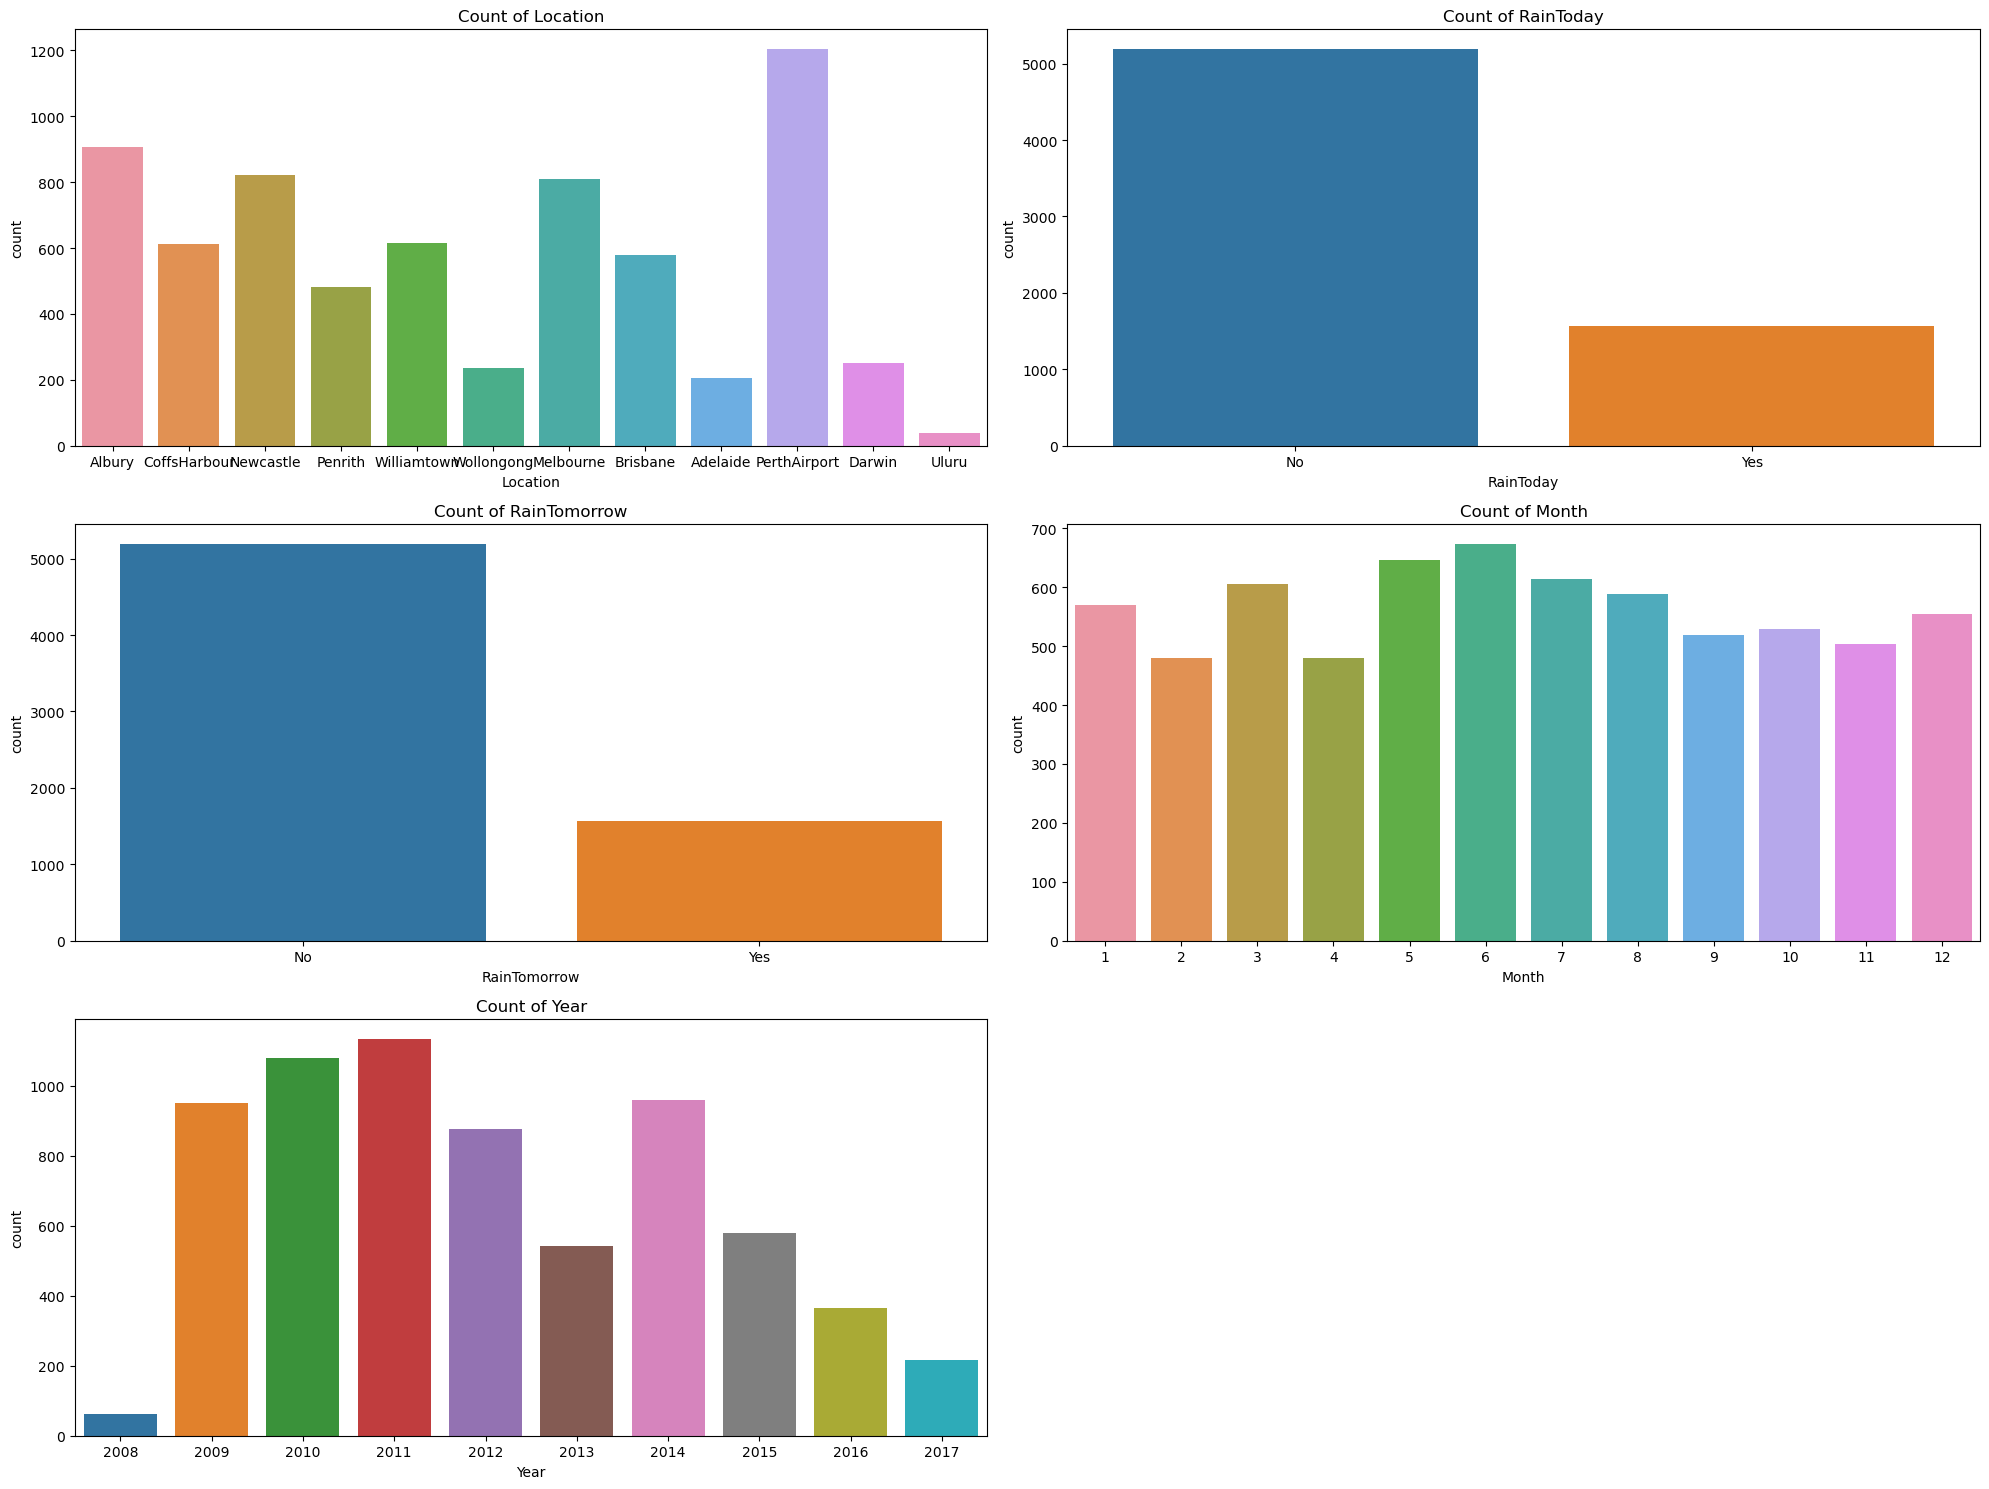

In [27]:
# Count Plots for Categorical Features
categorical_features = ['Location', 'RainToday', 'RainTomorrow', 'Month', 'Year']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()

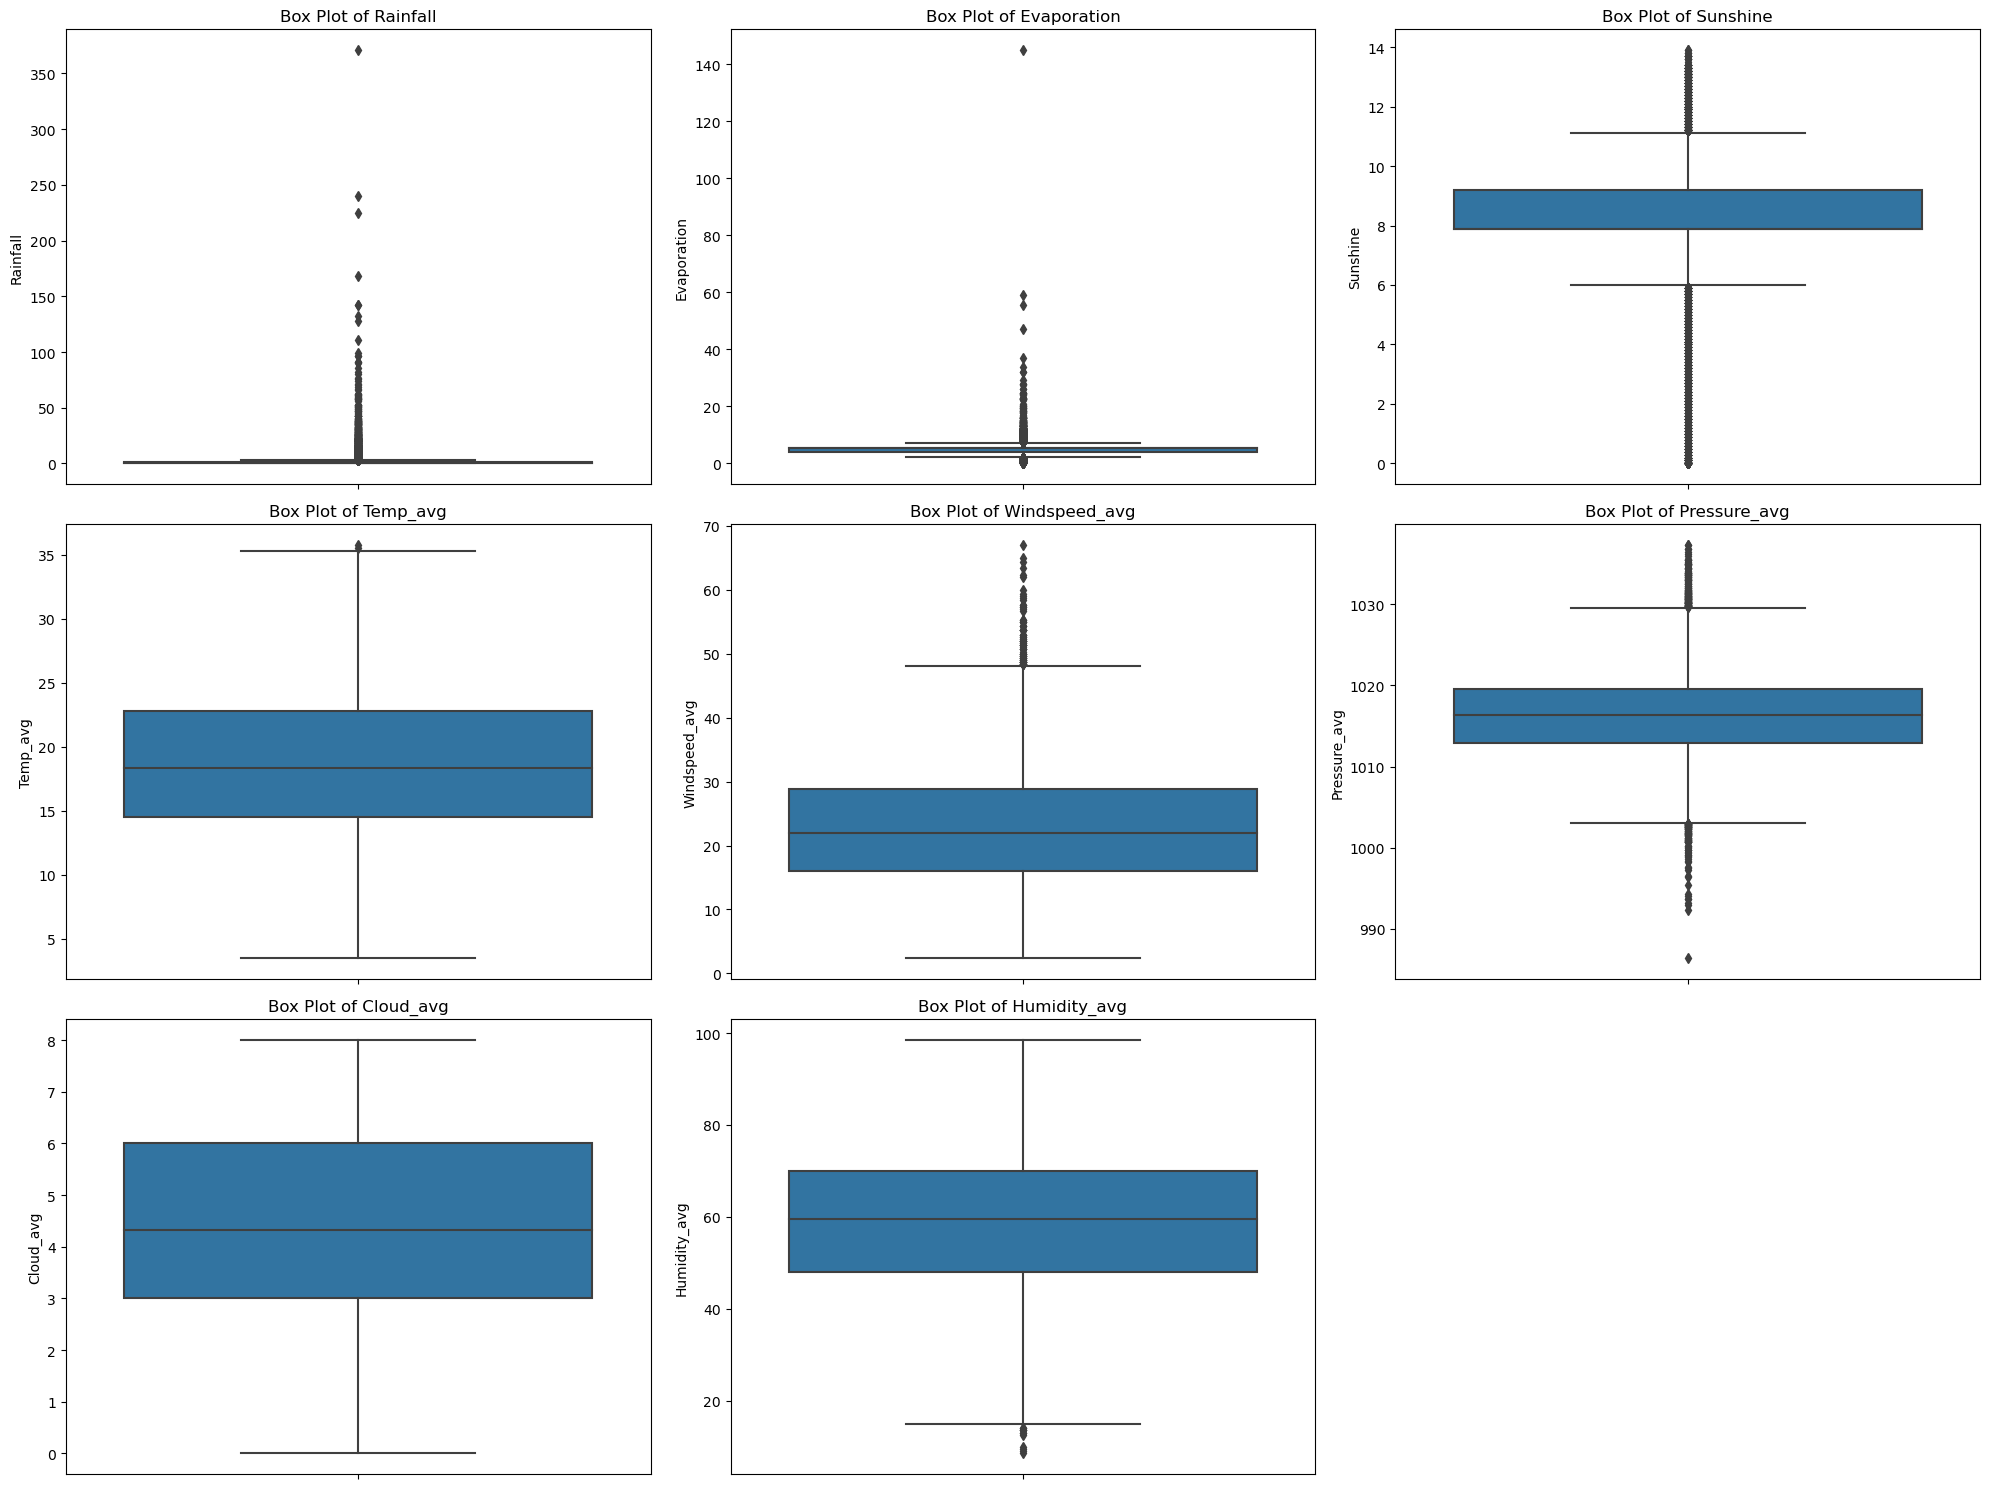

In [28]:
# Box Plots for Numerical Features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Bivariate analysis

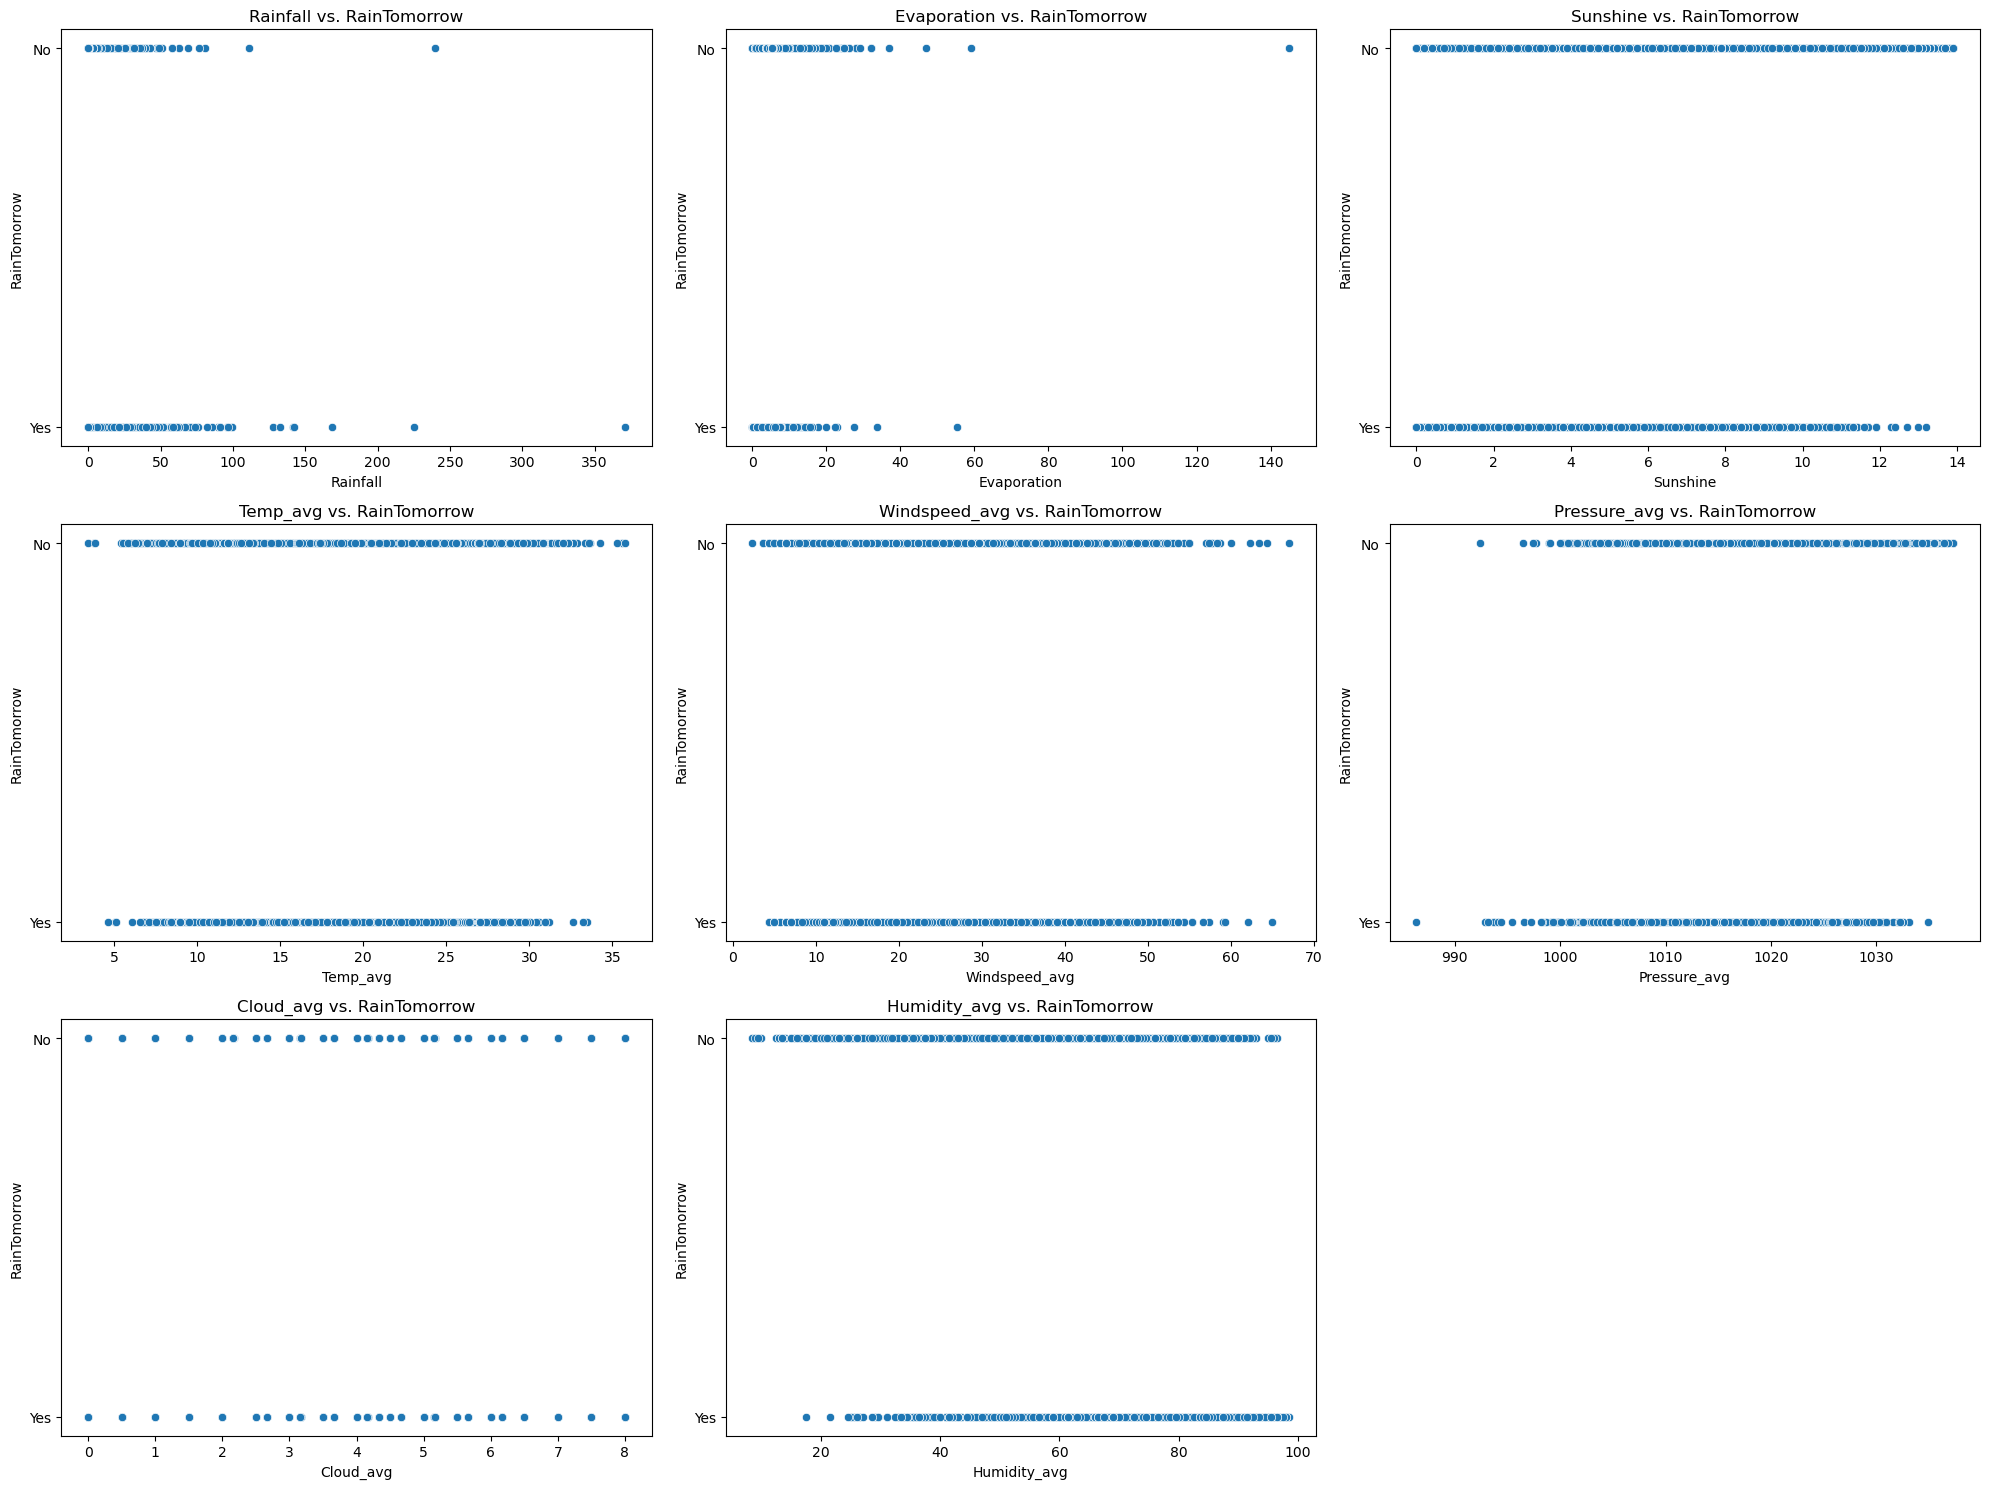

In [29]:

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['RainTomorrow'])
    plt.title(f'{feature} vs. RainTomorrow')
plt.tight_layout()
plt.show()

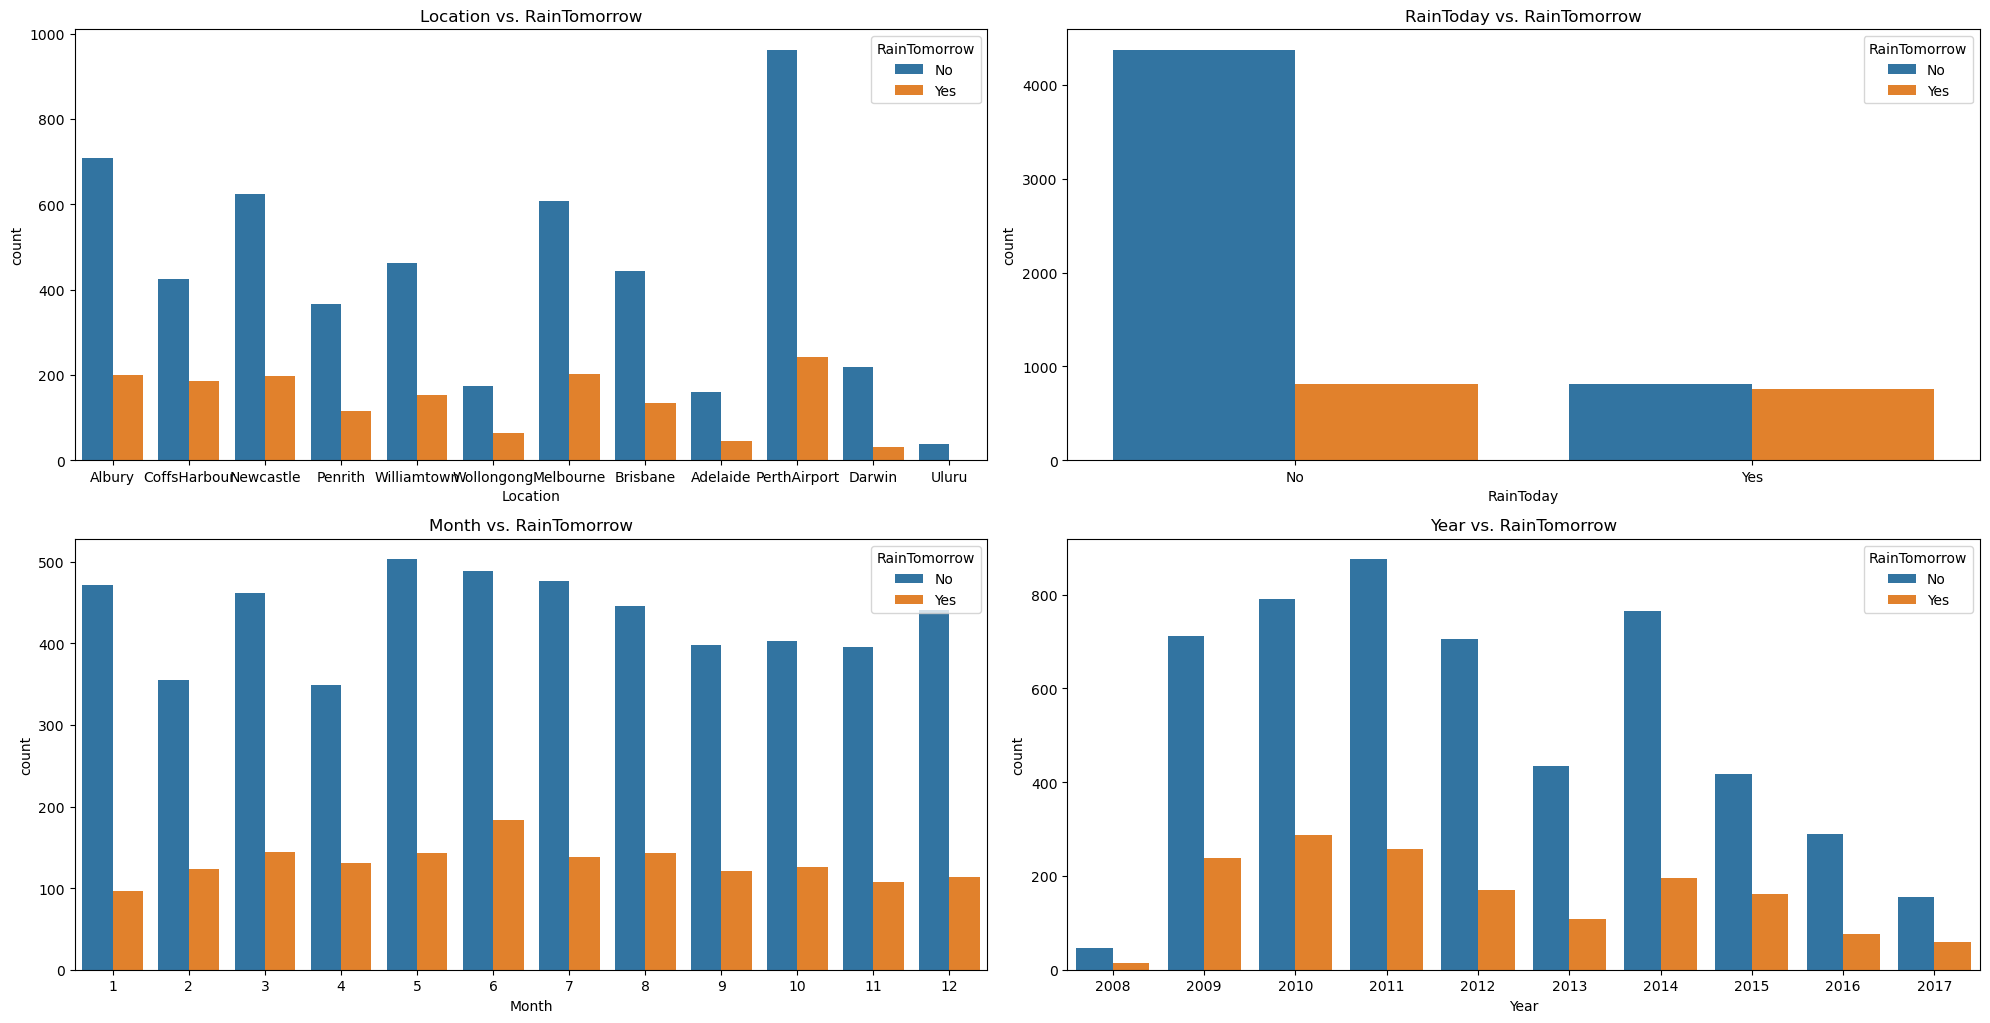

In [30]:
# Count Plots for categorical features vs. RainTomorrow
categorical_features = ['Location', 'RainToday', 'Month', 'Year']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[feature], hue=df['RainTomorrow'])
    plt.title(f'{feature} vs. RainTomorrow')
plt.tight_layout()
plt.show()

/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykernel_50542/4183211301.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


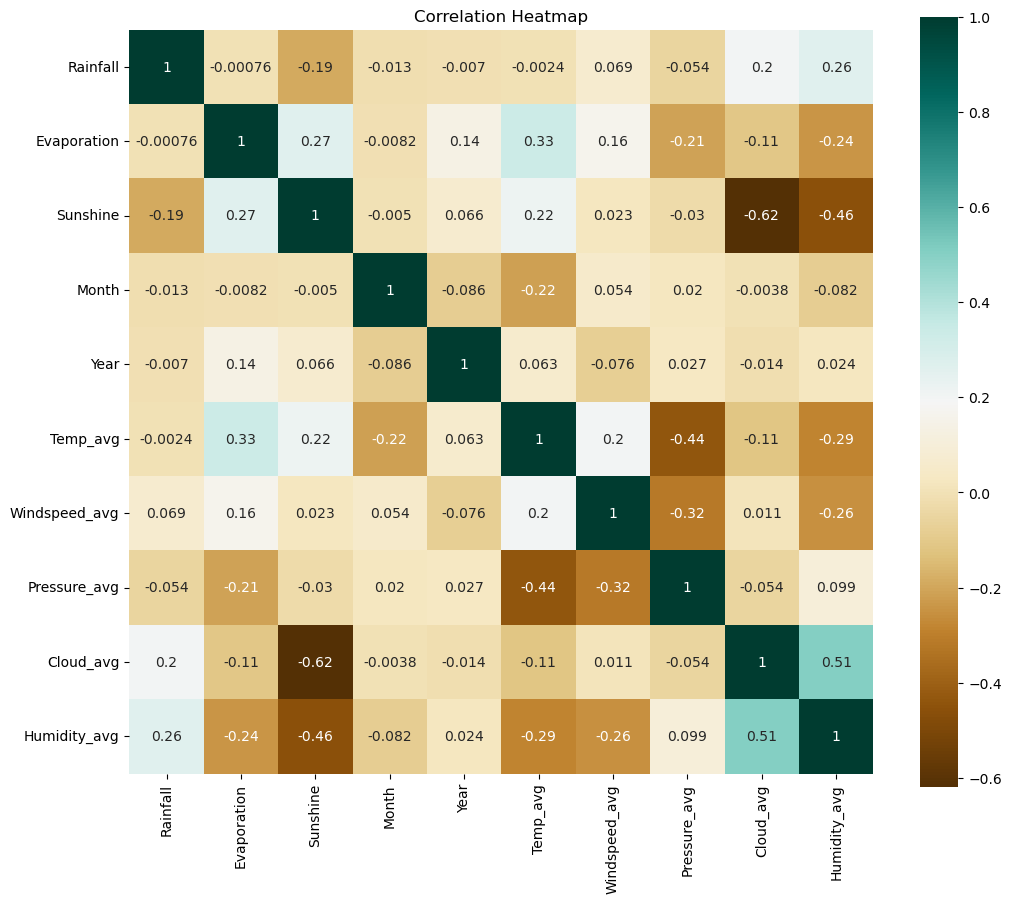

In [31]:
# Correlation Heatmap including RainTomorrow
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='BrBG', annot=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykernel_50542/3386051536.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RainTomorrow', y=feature, data=df, ci=None)
/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykernel_50542/3386051536.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RainTomorrow', y=feature, data=df, ci=None)
/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykernel_50542/3386051536.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RainTomorrow', y=feature, data=df, ci=None)
/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykernel_50542/3386051536.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RainTomorrow', y=feature, data=df, ci=None)
/var/folders/50/wd3xwy3j453gvdx9x80g5_140000gn/T/ipykern

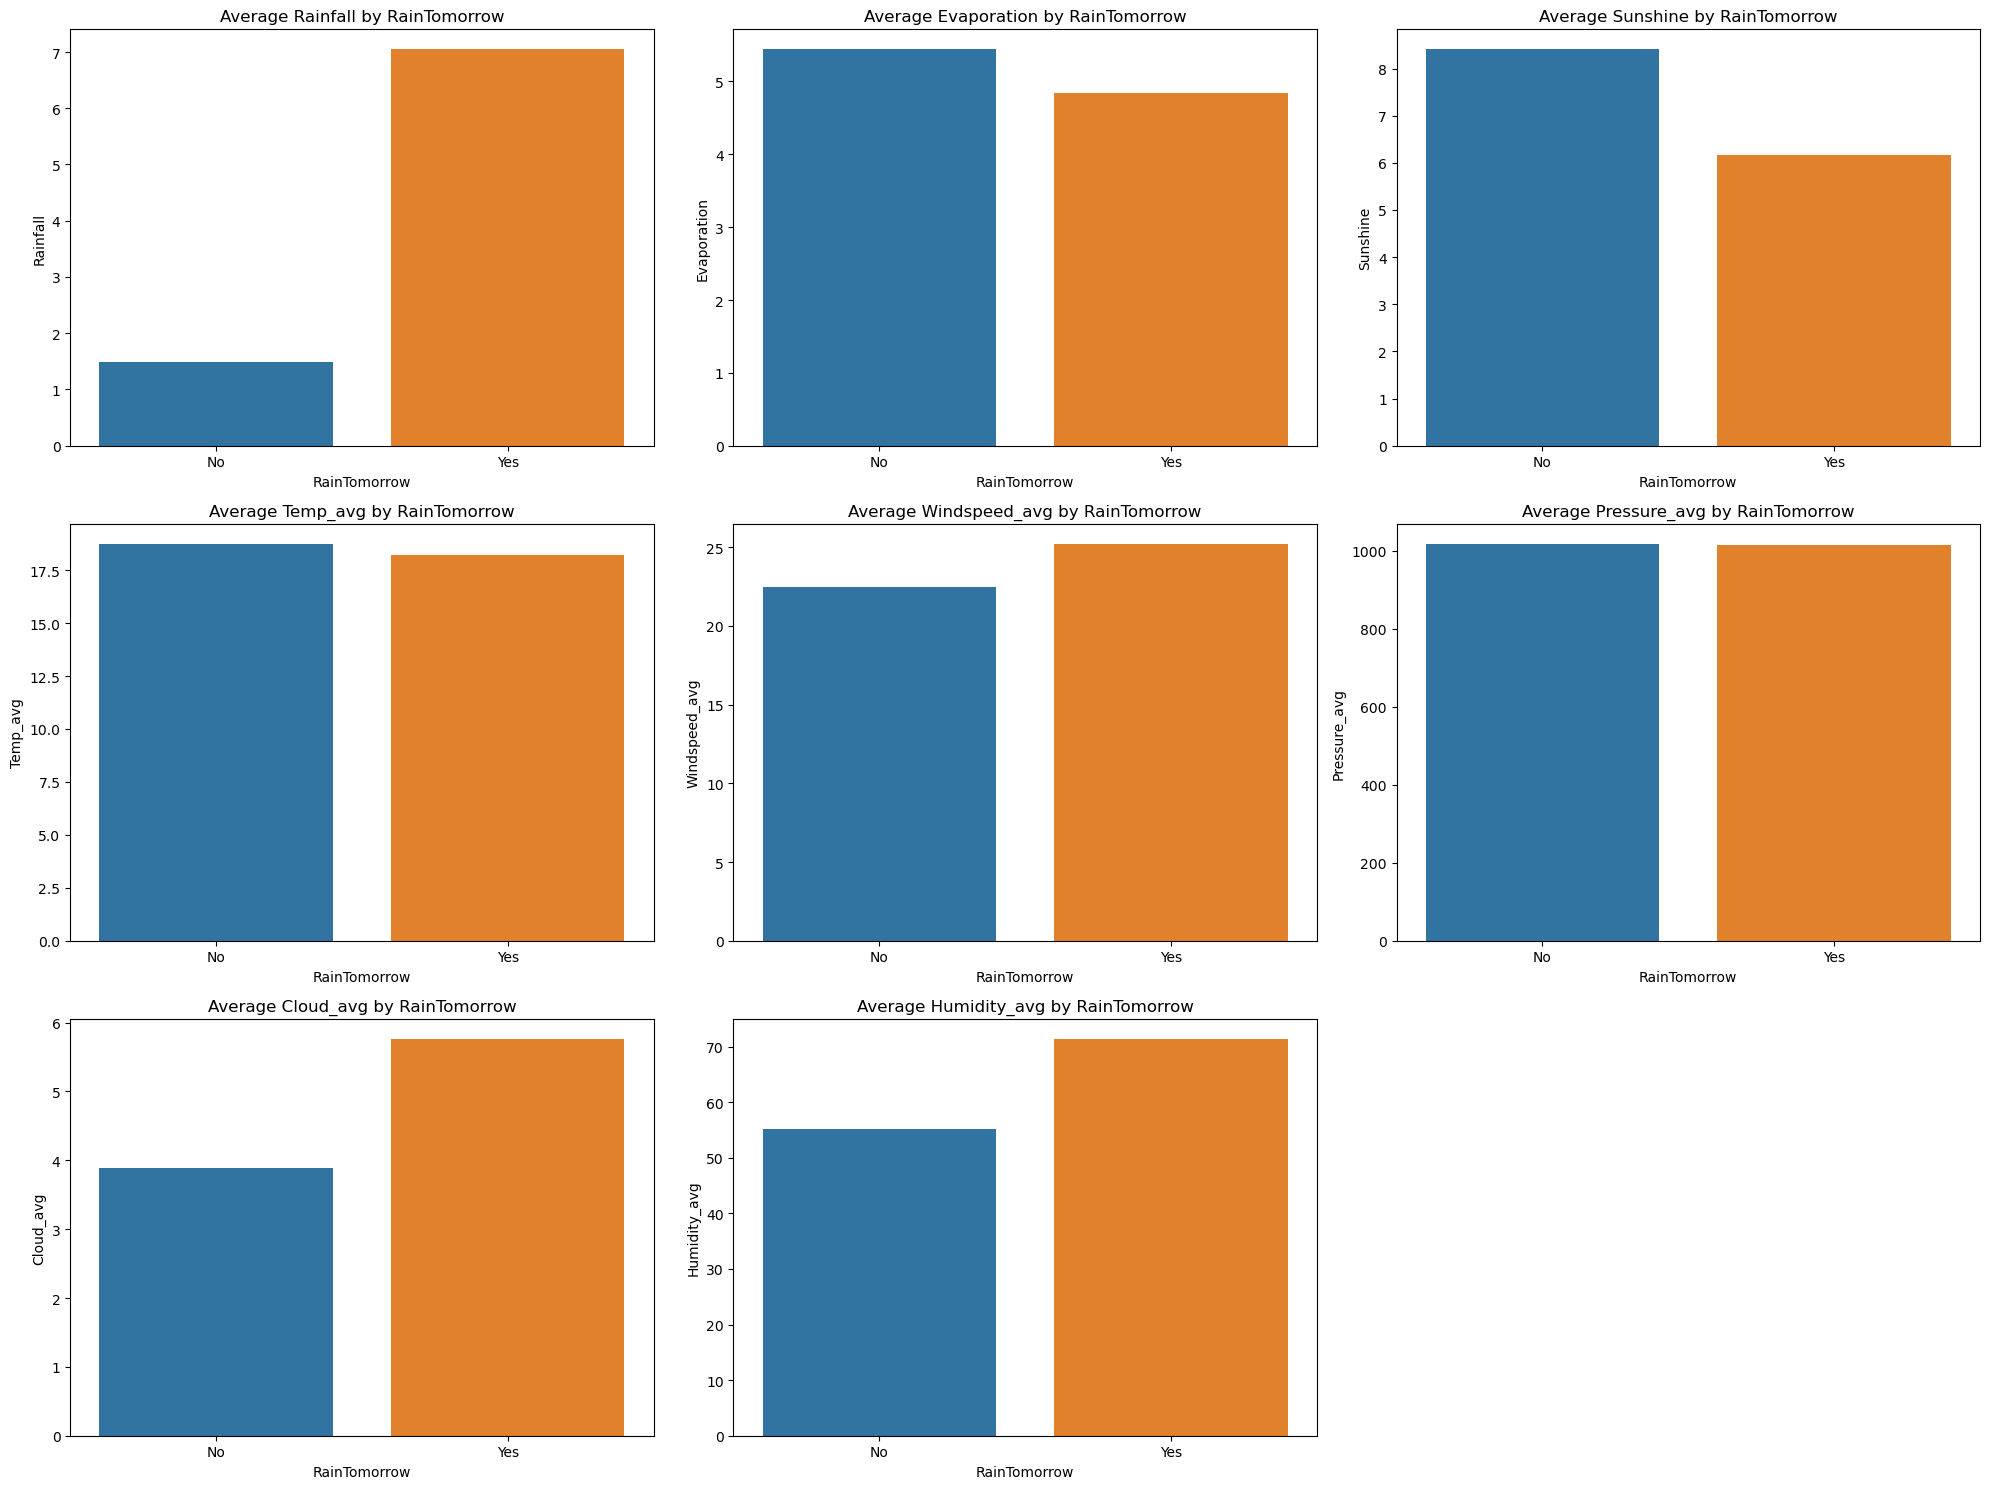

In [32]:

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x='RainTomorrow', y=feature, data=df, ci=None)
    plt.title(f'Average {feature} by RainTomorrow')
plt.tight_layout()
plt.show()

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In [34]:
X.head()

,Location,Rainfall,Evaporation,Sunshine,RainToday,Month,Year,Temp_avg,Windspeed_avg,Pressure_avg,Cloud_avg,Humidity_avg
0,Albury,0.6,5.302395,7.890896,No,12,2008,18.15,29.333333,1007.40,6.160494,46.5
1,Albury,0.0,5.302395,7.890896,No,12,2008,16.25,23.333333,1009.20,4.328897,34.5
2,Albury,0.0,5.302395,7.890896,No,12,2008,19.30,30.333333,1008.15,3.168403,34.0
3,Albury,0.0,5.302395,7.890896,No,12,2008,18.60,14.666667,1015.20,4.328897,30.5
4,Albury,1.0,5.302395,7.890896,No,12,2008,24.90,22.666667,1008.40,7.500000,57.5


In [35]:
y.value_counts()

No     5190
Yes    1572
Name: RainTomorrow, dtype: int64

In [36]:
# seperate dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.20,
                                                random_state=10)

In [37]:
X_train.shape, X_test.shape

((5409, 12), (1353, 12))

In [38]:
# create column transformer 

cat = X.select_dtypes(include = 'object').columns
num = X.select_dtypes(exclude = 'object').columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# create object for transformers 
ohe = OneHotEncoder(drop ='first')
ss = StandardScaler()

# creating column transformer object

preprocessor = ColumnTransformer(
[
    ("OneHotEncoder",ohe,cat),
    ("StandardScaler",ss,num)
]

)

In [39]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['Location', 'RainToday'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Rainfall', 'Evaporation', 'Sunshine', 'Month', 'Year', 'Temp_avg',
       'Windspeed_avg', 'Pressure_avg', 'Cloud_avg', 'Humidity_avg'],
      dtype='object'))])

In [40]:
# applying transformation on training data(fit_transform)
X_train = preprocessor.fit_transform(X_train)

In [41]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  1.90210375,
        -0.00682437,  0.42648245],
       [ 0.        ,  0.        ,  0.        , ..., -1.1224768 ,
        -0.00682437, -0.03872748],
       [ 0.        ,  1.        ,  0.        , ..., -0.06934987,
        -1.33461025, -0.31785345],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.20867564,
         1.24689887,  1.01574838],
       [ 0.        ,  1.        ,  0.        , ..., -0.31367532,
        -2.03865819, -1.77551126],
       [ 0.        ,  0.        ,  1.        , ...,  0.41930103,
        -0.63056231,  0.17837049]])

In [42]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,-0.001095,0.004987,-0.137001,-0.452699,-2.261166,-0.940108,1.902104,-0.006824,0.426482
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,4.227531,0.004987,1.640073,0.845630,0.447918,-0.294698,-1.122477,-0.006824,-0.038727
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,-0.375805,0.812886,-0.137001,-0.452699,-0.073764,-1.477950,-0.069350,-1.334610,-0.317853
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,-0.433347,-0.284255,0.455357,-0.019923,0.759097,-1.226958,0.073875,0.542851,0.674594
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,0.544862,0.739744,0.159178,-0.452699,-0.485618,-0.581547,0.335051,-0.395880,-1.465371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,0.487321,1.288314,1.640073,-1.318251,1.198408,1.820814,-1.703803,-1.099928,0.426482
5405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.260533,-0.001095,0.004987,1.640073,-1.751027,0.777401,0.458281,-0.777051,0.852864,1.108790
5406,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,-1.008764,-1.271682,-0.433180,-0.885475,-0.394094,-0.617403,0.208676,1.246899,1.015748
5407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,0.832571,0.739744,0.159178,-0.452699,-0.787644,-0.509835,-0.313675,-2.038658,-1.775511


In [43]:
# applying transformation on test dataset ( only transform)
X_test = preprocessor.transform(X_test)

In [44]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.260533,3.076697,1.471171,1.640073,-0.885475,2.250923,1.820814,-2.082929,-0.395880,-2.116665
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,0.026987,0.118030,-1.025539,-0.885475,0.457070,0.960267,0.562526,1.012216,-0.752049
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.260533,1.177821,1.946599,-1.617897,0.845630,1.381454,0.709274,-0.903426,-2.038658,-2.054637
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.241883,-0.778597,0.556887,0.159178,-0.452699,-1.519829,2.537936,1.489278,-1.334610,-0.410895
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.055390,-0.433347,0.922600,0.455357,-0.452699,-0.476465,-1.334526,0.924802,-1.099928,0.023301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,-0.001095,0.004987,-1.025539,-1.318251,0.457070,-1.011821,0.840552,-0.006824,-1.000161
1349,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.223234,-0.001095,0.004987,-0.729359,1.278406,0.264872,-1.084334,0.001945,1.716264,1.946168
1350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.260533,-1.066305,0.593458,-0.433180,-0.019923,-0.650359,-0.473979,0.520401,-1.569293,0.023301
1351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.260533,-0.001095,0.004987,-1.025539,-0.885475,1.042818,-0.330554,0.453001,0.852864,-0.162783


a) Design a predictive model with the use of machine learning algorithms to forecast 
whether or not it will rain tomorrow.

# Model Training

In [45]:
# import various ML models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_curve, roc_auc_score,f1_score, precision_score, recall_score

In [46]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier()
}

In [47]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_classification_report = classification_report(y_train,y_train_pred)

    
    
    # Test set performance 
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_classification_report = classification_report(y_test,y_test_pred)

    
    print(list(models.keys())[i])
    print('\n')
    print('Model performance for Training set')
    print("- Accuracy : {:.2f}".format(model_train_accuracy))
    print("- Classification Report :", model_train_classification_report)
  
    print("."*60)
    
    
    
    print(list(models.keys())[i])
    print('\n')
    print('Model performance for Testing set')
    print("- Accuracy : {:.2f}".format(model_test_accuracy))
    print("- Classification Report:", model_test_classification_report)

    print("-"*60)

LogisticRegression


Model performance for Training set
- Accuracy : 0.84
- Classification Report :               precision    recall  f1-score   support

          No       0.86      0.94      0.90      4156
         Yes       0.73      0.49      0.59      1253

    accuracy                           0.84      5409
   macro avg       0.79      0.72      0.74      5409
weighted avg       0.83      0.84      0.83      5409

............................................................
LogisticRegression


Model performance for Testing set
- Accuracy : 0.82
- Classification Report:               precision    recall  f1-score   support

          No       0.85      0.93      0.89      1034
         Yes       0.68      0.46      0.55       319

    accuracy                           0.82      1353
   macro avg       0.76      0.70      0.72      1353
weighted avg       0.81      0.82      0.81      1353

------------------------------------------------------------
RandomForest


Model perfo

Conclusions :

- Logistic Regression and AdaBoost have similar performance, both in training and testing, with no signs of overfitting.
- Random Forest shows overfitting, with perfect performance on the training set but a drop in performance on the testing set.

In [48]:
# Hyperparameter Tuning on Logistic Regression

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search_ada = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_ada.fit(X_train, y_train)

# Get the best parameters and best score
best_params_ada = grid_search_ada.best_params_
best_score_ada = grid_search_ada.best_score_

print("Best parameters for AdaBoost:", best_params_ada)
print("Best cross-validation score for AdaBoost: {:.2f}".format(best_score_ada))


Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score for AdaBoost: 0.83


# Problem : b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
# independent and dependent features 
X1 = df.drop(['Rainfall'], axis = 1)
y1 = df['Rainfall']

In [53]:
X1.head()

,Location,Evaporation,Sunshine,RainToday,RainTomorrow,Month,Year,Temp_avg,Windspeed_avg,Pressure_avg,Cloud_avg,Humidity_avg
0,Albury,5.302395,7.890896,No,No,12,2008,18.15,29.333333,1007.40,6.160494,46.5
1,Albury,5.302395,7.890896,No,No,12,2008,16.25,23.333333,1009.20,4.328897,34.5
2,Albury,5.302395,7.890896,No,No,12,2008,19.30,30.333333,1008.15,3.168403,34.0
3,Albury,5.302395,7.890896,No,No,12,2008,18.60,14.666667,1015.20,4.328897,30.5
4,Albury,5.302395,7.890896,No,No,12,2008,24.90,22.666667,1008.40,7.500000,57.5


In [54]:
# seperate dataset into train and test
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,
                                                 test_size = 0.20,
                                                random_state=10)

In [55]:
pd.DataFrame(X1_train)

,Location,Evaporation,Sunshine,RainToday,RainTomorrow,Month,Year,Temp_avg,Windspeed_avg,Pressure_avg,Cloud_avg,Humidity_avg
892,Albury,5.302395,7.890896,No,No,6,2011,6.25,14.333333,1027.65,4.328897,66.0
6904,Adelaide,20.000000,7.890896,No,No,12,2014,21.05,20.333333,1009.70,4.328897,58.5
6256,Brisbane,4.000000,10.100000,No,No,6,2011,18.20,9.333333,1015.95,1.500000,54.0
6701,Brisbane,3.800000,7.100000,No,No,8,2012,22.75,11.666667,1016.80,5.500000,70.0
6291,Brisbane,7.200000,9.900000,No,No,7,2011,15.95,17.666667,1018.35,3.500000,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,CoffsHarbour,7.000000,11.400000,No,No,12,2009,25.15,40.000000,1006.25,2.000000,66.0
3441,Wollongong,5.302395,7.890896,No,No,12,2008,22.85,27.333333,1011.75,6.160494,77.0
1344,CoffsHarbour,1.800000,4.400000,No,Yes,5,2010,16.45,17.333333,1017.60,7.000000,75.5
6286,Brisbane,8.200000,9.900000,No,No,7,2011,14.30,18.333333,1014.50,0.000000,30.5


In [57]:
y1.value_counts()

0.000000      4334
0.200000       321
0.400000       144
2.780148       138
0.600000        87
              ... 
73.800000        1
23.800000        1
61.200000        1
128.000000       1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [61]:
# create column transformer 

cat = X1.select_dtypes(include = 'object').columns
num = X1.select_dtypes(exclude = 'object').columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# create object for transformers 
ohe = OneHotEncoder(drop ='first')
ss = StandardScaler()

# creating column transformer object

preprocessor = ColumnTransformer(
[
    ("OneHotEncoder",ohe,cat),
    ("StandardScaler",ss,num)
]

)

In [62]:
# applying transformation on training data(fit_transform)
X1_train = preprocessor.fit_transform(X1_train)
X1_train

array([[ 1.        ,  0.        ,  0.        , ...,  1.90210375,
        -0.00682437,  0.42648245],
       [ 0.        ,  0.        ,  0.        , ..., -1.1224768 ,
        -0.00682437, -0.03872748],
       [ 0.        ,  1.        ,  0.        , ..., -0.06934987,
        -1.33461025, -0.31785345],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.20867564,
         1.24689887,  1.01574838],
       [ 0.        ,  1.        ,  0.        , ..., -0.31367532,
        -2.03865819, -1.77551126],
       [ 0.        ,  0.        ,  1.        , ...,  0.41930103,
        -0.63056231,  0.17837049]])

In [63]:
# applying transformation on test dataset ( only transform)
X1_test = preprocessor.transform(X1_test)
X1_test

array([[ 0.        ,  0.        ,  0.        , ..., -2.08292856,
        -0.39587966, -2.11666521],
       [ 0.        ,  0.        ,  0.        , ...,  0.56252629,
         1.01221622, -0.75204939],
       [ 0.        ,  0.        ,  0.        , ..., -0.9034264 ,
        -2.03865819, -2.05463722],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.52040121,
        -1.5692929 ,  0.02330051],
       [ 1.        ,  0.        ,  0.        , ...,  0.45300109,
         0.8528638 , -0.16278347],
       [ 0.        ,  0.        ,  0.        , ...,  1.07645223,
         1.71626416,  1.35690233]])

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [59]:
# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

In [69]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
    mae = mean_absolute_error(y1_test, y1_pred)
    results[model_name] = {'RMSE': rmse, 'MAE': mae}

In [70]:
# Display results
results_df = pd.DataFrame(results).T
results_df

,RMSE,MAE
Linear Regression,8.075598,3.125449
Decision Tree,10.307023,2.960801
Random Forest,7.096956,2.320135
Gradient Boosting,7.015234,2.422995
Support Vector Regressor,8.613934,2.091228


- Based on the results provided, the best model is the Gradient Boosting model, which has the lowest RMSE (7.015234) and a relatively low MAE (2.422995).